# Final Project

---
<br>

### Name and ID:
Student 1:
<br>
Student 2:

# Part 1 -  Test Environment - utils and imports

### Importing the libraries, Loading model

In [6]:
import os
import gdown
import torch
import random
import numpy as np
import torch.nn as nn
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from __future__ import print_function
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models
import torchvision.transforms as T


import copy

!gdown --id 15hHNu52vbQ38ZXLE8tMpHEQbwp470d4J
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=15hHNu52vbQ38ZXLE8tMpHEQbwp470d4J
To: /content/gen_M.pkl
100% 35.8M/35.8M [00:00<00:00, 112MB/s] 
cuda


## Utils

unloader - reconvert into PIL image
we need to pause a bit at the end so that plots are updated

In [7]:
unloader = transforms.ToPILImage()  # reconvert into PIL image

def imshow(tensor, title=None):
    image = tensor.cpu().clone()
    image = image.squeeze(0)
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)


In [8]:
class ImagesLoader(Dataset):
  def __init__(self,path) -> None:
    self.path = path
    self.transform = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor(),
    ])

  def __len__(self) -> int:
    return 1


  def __getitem__(self, idx):
    self.path = self.path.split(' ')[0]
    img =  Image.open(self.path).convert('RGB')
    img = self.transform(img)
    return img

## Load model and photos.

In [9]:
import torch.nn as nn

class ResBlock(nn.Module):
    def __init__(self, f):
        super(ResBlock, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(f, f, 3, 1, 1),
            nn.InstanceNorm2d(f),
            nn.ReLU(),

            nn.Conv2d(f, f, 3, 1, 1),
        )

        self.norm = nn.InstanceNorm2d(f)

    def forward(self, x):
        return torch.relu(self.conv(x) + x)

class Generator(nn.Module):
    def __init__(self, f=64, res_blocks=6):
        super(Generator, self).__init__()
        layers = []

        layers.extend([
            nn.Conv2d(3, f, 7, 1, 3),
            nn.InstanceNorm2d(f),
            nn.ReLU(True),

            nn.Conv2d(f, f * 2, 3, 2, 1),
            nn.InstanceNorm2d(f * 2),
            nn.ReLU(True),

            nn.Conv2d(f * 2, f * 4, 3, 2, 1),
            nn.InstanceNorm2d(f * 4),
            nn.ReLU(True)
        ])

        for i in range(res_blocks):
            layers.append(ResBlock(f * 4))

        layers.extend([
            nn.ConvTranspose2d(f * 4, f * 2 * 4, 3, 1, 1),
            nn.PixelShuffle(2),
            nn.InstanceNorm2d(f * 2),
            nn.ReLU(True),

            nn.ConvTranspose2d(f * 2, f * 4, 3, 1, 1),
            nn.PixelShuffle(2),
            nn.InstanceNorm2d(f),
            nn.ReLU(True),

            nn.ReflectionPad2d(3),
            nn.Conv2d(f, 3, 7, 1, 0),
            nn.Tanh()

        ])

        self.conv = nn.Sequential(*layers)

    def forward(self, x):
        return self.conv(x)

In [10]:
import pickle


gen_M = pickle.load(open('/content/gen_M.pkl','rb'))

###Use cuda if available


In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


#Part 2 - Infering

####Netork Layout

## Choosing Input  - plain image from data set

### Insert your input image, and we will do magic to style it ;)


In [12]:
from google.colab import files
import imageio as iio

uploaded = files.upload()
for fn in uploaded.keys():
  print(fn)
  plain_photo = ImagesLoader('./'+fn)
  img = iio.imread(fn)
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 00104fd531.jpg to 00104fd531.jpg
00104fd531.jpg
User uploaded file "00104fd531.jpg" with length 7948 bytes


<ipython-input-12-cacaccefb14a>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = iio.imread(fn)


### convert plain image, style image to device.

In [13]:
input_img = plain_photo.__getitem__(0)
content_img = plain_photo.__getitem__(0)
input_img = input_img[None, :]
content_img = content_img[None, :]
input_img = input_img.to(device)
content_img = content_img.to(device)


### plot input image

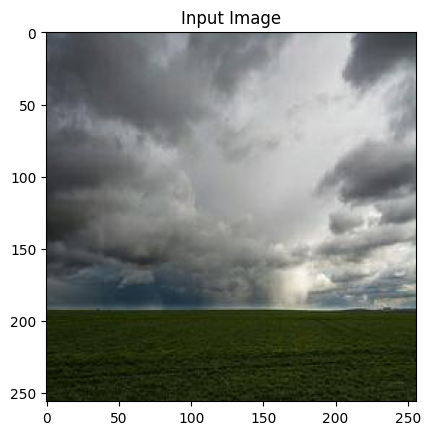

In [14]:
input_img = content_img.clone()
plt.figure()
imshow(input_img, title='Input Image')

Gradient Descent


# Part 3 - run the model

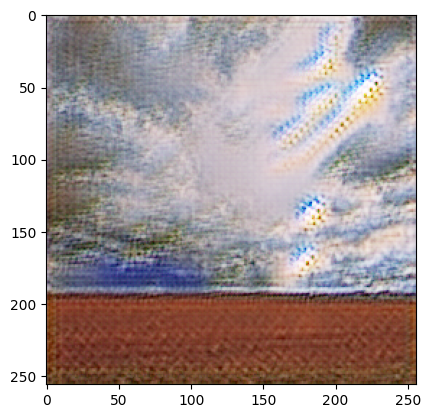

In [15]:
# photo = img
fake_monet = gen_M(input_img).cpu().detach()[0]

plt.imshow(fake_monet.squeeze().permute(1, 2, 0) )

plt.show()

